<center>
## <span style=color:blue> Convolution </span>

In [62]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.fftpack import fft, ifft
from IPython.html.widgets import interact

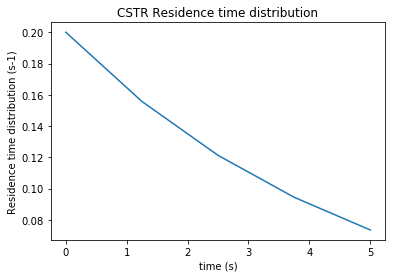

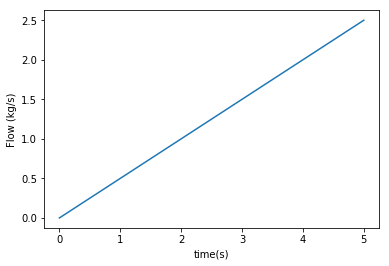

In [64]:
# continues stirred tank reactor 
t = np.linspace(0,5,5)
tm = 5 # residence time 
Ecstr = 1/tm*np.exp(-t/tm) # residence time distribution for CSTR
plt.figure(1)
plt.plot(t,Ecstr)
plt.title('CSTR Residence time distribution')
plt.ylabel('Residence time distribution (s-1)')
plt.xlabel('time (s)')
plt.show()

K = 0.5  # Gain
Input_flow = K*t # ramp perturbation

# If it was necessary to normalize (or analysis)
#A_Input_flow = (Input_flow[-1]-Input_flow[0])*(t[-1]-t[0])/2 
# it is a triangle
#EPert = Input_flow/A_Input_flow # normalized signal

plt.figure(2)
plt.plot(t,Input_flow)
plt.xlabel('time(s)')
plt.ylabel('Flow (kg/s)')
plt.show()


__ ¿What would happen when input signal (flow) interacts with the existing stirred tank reactor vessel? __

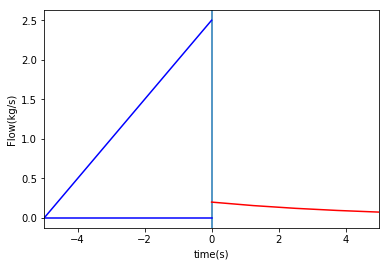

In [92]:
# z is convolution time 
z_max = t[-1] + t[-1] # time associated with both signals
tmax = t[-1]

def convolution_show(z = 0 ):
    Input_flow = K*t # ramp perturbation
    straight_line = np.zeros(len(Input_flow))
    #vertical_line = np.array(Input_flow[0],Input_flow[-1])
    plt.axvline(z,ymin = 0, ymax = Input_flow[-1])
    plt.plot(t,Ecstr,'r',t-t[-1]+z,Input_flow,'b',t-t[-1]+z,straight_line,'b')
    plt.xlim(xmin=-tmax,xmax=tmax)
    plt.xlabel('time(s)')
    plt.ylabel('Flow(kg/s)')
    plt.show()

interact(convolution_show, z = (0,z_max,1))

print(Input_flow[-1])

__Result__

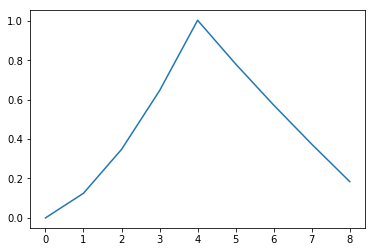

In [30]:
output_signal = np.convolve(Input_flow,Ecstr)
plt.plot(output_signal)
plt.show()